In [1]:
root_path = "/Users/danieldubovski/projects/deep_query_optimization"

import sys
import os
sys.path.insert(0, root_path)

In [2]:
# import tkinter
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib as mpl

plt_backend = mpl.get_backend()
print(plt_backend)
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Panel
import numpy as np
import pytorch_lightning as pl
import torch
from importlib import reload 
from tqdm.auto import tqdm
from collections import Counter
import sklearn
import seaborn as sns
from sklearn import metrics as skm
import json

from dqo.estimator.treelstm import evaluate as ge, v1, v2
from dqo import datasets

mpl.use(plt_backend)

module://ipykernel.pylab.backend_inline


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  # Remove the CWD from sys.path while we load stuff.


# TPCH

In [6]:
ds_name = 'tpcd'
ds = datasets.QueriesDataset(f'{ds_name}:optimized')

In [6]:
from collections import defaultdict
metas = [
#     (v1, os.path.join(os.getcwd(), 'logs/tpch/version_0/checkpoints/epoch=102-step=1674952.ckpt')),
#     # aug
#     (v1, os.path.join(os.getcwd(), 'logs/aug/version_0/checkpoints/epoch=3-step=607559.ckpt')),
#     (v1, os.path.join(os.getcwd(), 'logs/aug/version_0/checkpoints/epoch=3-step=607559.ckpt')),
    (v2, os.path.join(os.getcwd(),'v2/logs/tpch/version_0/checkpoints/epoch=29-step=490919.ckpt')),
    (v2, os.path.join(os.getcwd(),'v2/logs/aug/version_0/checkpoints/epoch=11-step=1822679.ckpt')),
    (v2, os.path.join(os.getcwd(),'v2/logs/all/version_1/checkpoints/epoch=28-step=2193878.ckpt'))
]

r = defaultdict(dict)
for meta in metas:
    version, checkpoint = meta
    for ds_name in ['tpcd', 'tpch', 'imdb','tpcds']:
        ds = datasets.QueriesDataset(f'{ds_name}:optimized')

        estimater = ge.QueryEstimater(
            checkpoint, 
            dataset=ds, 
            encoder=version.encoder, 
            model_cls=version.model.TreeRegressor
        )

        results = estimater.evaluate()
        r[str(version.__name__)][ds_name] = results
        print(f'df: {ds_name} v: {str(version.__name__)}, :: ', json.dumps(ge.evaluate_metrics(results)))

  0%|          | 0/343 [00:00<?, ?it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 13%|█▎        | 46/343 [00:04<00:22, 13.08it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 343/343 [00:24<00:00, 14.07it/s]


df: tpcd v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.1836734693877551, "balanced accuracy": 0.08072916666666664, "kappa": 0.10153984320916043, "recall": 0.15144230769230768, "mae": 2.0408163265306123, "f1 macro": 0.13492199942681882, "f1 weighted": 0.1636371771473954}


100%|██████████| 270/270 [00:19<00:00, 14.02it/s]


df: tpch v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.3296296296296296, "balanced accuracy": 0.24621212121212124, "kappa": 0.2642276422764227, "recall": 0.3090277777777778, "mae": 1.537037037037037, "f1 macro": 0.2871643621416424, "f1 weighted": 0.30630865295108517}


100%|██████████| 167/167 [00:21<00:00,  7.61it/s]


df: imdb v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.11976047904191617, "balanced accuracy": 0.02272727272727274, "kappa": 0.026760228353948534, "recall": 0.10416666666666667, "mae": 2.8502994011976046, "f1 macro": 0.0838140267927502, "f1 weighted": 0.0963610367916649}


100%|██████████| 636/636 [01:26<00:00,  7.39it/s]
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


df: tpcds v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.05188679245283019, "balanced accuracy": -0.005347995917863774, "kappa": -0.003393413585689675, "recall": 0.07239784960796142, "mae": 4.34748427672956, "f1 macro": 0.03228754947249219, "f1 weighted": 0.03094472745215419}


100%|██████████| 343/343 [00:26<00:00, 13.19it/s]


df: tpcd v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.1749271137026239, "balanced accuracy": 0.07586805555555555, "kappa": 0.09277916931474062, "recall": 0.1469551282051282, "mae": 2.020408163265306, "f1 macro": 0.12252967000431156, "f1 weighted": 0.14569196128802803}


100%|██████████| 270/270 [00:18<00:00, 14.58it/s]


df: tpch v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.36666666666666664, "balanced accuracy": 0.32954545454545464, "kappa": 0.305630752571738, "recall": 0.38541666666666674, "mae": 1.3962962962962964, "f1 macro": 0.3677567295015935, "f1 weighted": 0.3389405114683664}


100%|██████████| 167/167 [00:21<00:00,  7.81it/s]


df: imdb v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.15568862275449102, "balanced accuracy": 0.056818181818181816, "kappa": 0.06803609593920679, "recall": 0.13541666666666666, "mae": 2.2395209580838324, "f1 macro": 0.0942415850623397, "f1 weighted": 0.10834960677825882}


100%|██████████| 636/636 [01:25<00:00,  7.43it/s]


df: tpcds v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.3632075471698113, "balanced accuracy": 0.23039989980779457, "kappa": 0.2827247437407585, "recall": 0.2945332414904783, "mae": 1.2138364779874213, "f1 macro": 0.27788470144908767, "f1 weighted": 0.3279388295358739}


100%|██████████| 343/343 [00:25<00:00, 13.65it/s]


df: tpcd v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.15451895043731778, "balanced accuracy": 0.054687499999999986, "kappa": 0.06945198046663048, "recall": 0.12740384615384615, "mae": 2.131195335276968, "f1 macro": 0.09497613628184656, "f1 weighted": 0.11518971630684598}


100%|██████████| 270/270 [00:18<00:00, 14.40it/s]


df: tpch v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.3296296296296296, "balanced accuracy": 0.24621212121212124, "kappa": 0.2642276422764228, "recall": 0.3090277777777778, "mae": 1.511111111111111, "f1 macro": 0.29843637970509723, "f1 weighted": 0.31833213835210367}


100%|██████████| 167/167 [00:22<00:00,  7.36it/s]


df: imdb v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.2994011976047904, "balanced accuracy": 0.22386363636363638, "kappa": 0.22682125756796323, "recall": 0.28854166666666664, "mae": 2.029940119760479, "f1 macro": 0.2504111070785197, "f1 weighted": 0.2538606109746107}


100%|██████████| 636/636 [01:27<00:00,  7.27it/s]

df: tpcds v: dqo.estimator.treelstm.v2, ::  {"accuracy": 0.46855345911949686, "balanced accuracy": 0.34953738535481726, "kappa": 0.4050613293185139, "recall": 0.4037426032419158, "mae": 0.9465408805031447, "f1 macro": 0.4046817622592212, "f1 weighted": 0.44628070296944333}


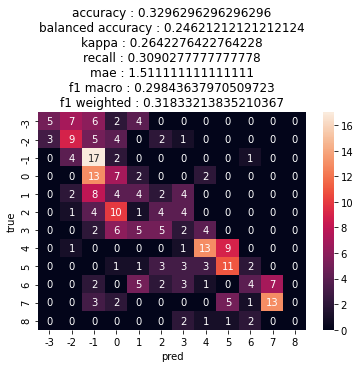

              precision    recall  f1-score   support

          -3       0.62      0.21      0.31        24
          -2       0.38      0.38      0.38        24
          -1       0.28      0.71      0.40        24
           0       0.18      0.29      0.23        24
           1       0.18      0.17      0.17        24
           2       0.22      0.17      0.19        24
           3       0.10      0.08      0.09        24
           4       0.54      0.54      0.54        24
           5       0.42      0.46      0.44        24
           6       0.40      0.17      0.24        24
           7       0.65      0.54      0.59        24
           8       0.00      0.00      0.00         6

    accuracy                           0.33       270
   macro avg       0.33      0.31      0.30       270
weighted avg       0.35      0.33      0.32       270

2
           abs_err              err_ratio          
              mean      median       mean    median
bucket                     

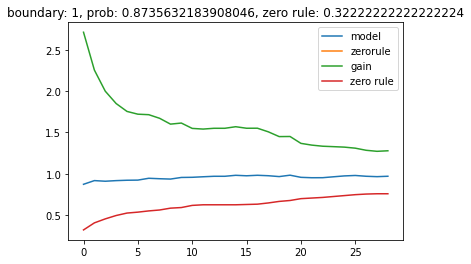

In [7]:
ge.display_results(r['dqo.estimator.treelstm.v2']['tpch'])

# Trained on TPCH, Inference on TPCD

---

# ALL

In [12]:
from collections import defaultdict
metas = [
    (v1, os.path.join(os.getcwd(), 'logs/all/version_0/checkpoints/epoch=0-step=22022.ckpt')),
]

r = defaultdict(dict)
for meta in metas:
    version, checkpoint = meta
    for ds_name in ['tpcd', 'tpch', 'imdb','tpcds']:
        ds = datasets.QueriesDataset(f'{ds_name}:optimized')

        estimater = ge.QueryEstimater(
            checkpoint, 
            dataset=ds, 
            encoder=version.encoder, 
            model_cls=version.model.TreeRegressor
        )

        results = estimater.evaluate()
        r[str(version.__name__)][ds_name] = results
        print(f'df: {ds_name} v: {str(version.__name__)}, :: ', json.dumps(ge.evaluate_metrics(results)))

  0%|          | 0/343 [00:00<?, ?it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 13%|█▎        | 46/343 [00:25<02:06,  2.34it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 343/343 [01:56<00:00,  2.93it/s]


df: tpcd v: dqo.estimator.treelstm.v1, ::  {"accuracy": 0.14868804664723032, "balanced accuracy": 0.04947916666666665, "kappa": 0.06109324758842438, "recall": 0.12259615384615384, "mae": 2.5510204081632653, "f1 macro": 0.06582742287981776, "f1 weighted": 0.07983734086881687}


100%|██████████| 270/270 [01:13<00:00,  3.68it/s]


df: tpch v: dqo.estimator.treelstm.v1, ::  {"accuracy": 0.13333333333333333, "balanced accuracy": 0.04545454545454546, "kappa": 0.04878048780487809, "recall": 0.125, "mae": 2.6814814814814816, "f1 macro": 0.07588685388685389, "f1 weighted": 0.08094597747931082}


100%|██████████| 167/167 [01:10<00:00,  2.36it/s]


df: imdb v: dqo.estimator.treelstm.v1, ::  {"accuracy": 0.12574850299401197, "balanced accuracy": 0.028409090909090915, "kappa": 0.03311258278145679, "recall": 0.109375, "mae": 2.940119760479042, "f1 macro": 0.061052054098379584, "f1 weighted": 0.07019158315502323}


100%|██████████| 636/636 [05:42<00:00,  1.86it/s]

df: tpcds v: dqo.estimator.treelstm.v1, ::  {"accuracy": 0.12106918238993711, "balanced accuracy": 0.0034658324132008293, "kappa": 0.0035985740230040086, "recall": 0.08651034637876742, "mae": 2.2940251572327046, "f1 macro": 0.028962209851725856, "f1 weighted": 0.036682707628051335}


---

## NUMBERS VS STRINGS

In [65]:
qe = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v7/logs/three/version_1/checkpoints/epoch=67-step=3480218.ckpt'), 
    dataset='imdb:optimized', 
    encoder=v7.encoder, 
    model_cls=v7.model.GereltRegressor
)
r = qe.evaluate(df=datasets.QueriesDataset('imdb:only_strings').load())
json.dumps(ge.evaluate_metrics(r))

2021-02-02 17:08:16,615 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_strings/runtimes/data_part_00.csv [1/1]
2021-02-02 17:08:16,618 | dqo.datasets | INFO | Loaded 47 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_strings/runtimes/data_part_00.csv [1/1]
100%|██████████| 47/47 [00:01<00:00, 29.89it/s]
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


'{"accuracy": 0.6808510638297872, "balanced accuracy": 0.7151785714285714, "kappa": 0.6281645569620253, "recall": 0.6721428571428572, "mae": 0.425531914893617, "f1 macro": 0.6384273504273504, "f1 weighted": 0.6861413763541423}'

In [66]:
qe = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v7/logs/three/version_1/checkpoints/epoch=67-step=3480218.ckpt'), 
    dataset='imdb:optimized', 
    encoder=v7.encoder, 
    model_cls=v7.model.GereltRegressor
)
r = qe.evaluate(df=datasets.QueriesDataset('imdb:only_numbers').load())
json.dumps(ge.evaluate_metrics(r))

2021-02-02 17:08:37,992 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_numbers/runtimes/data_part_00.csv [1/1]
2021-02-02 17:08:37,996 | dqo.datasets | INFO | Loaded 124 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_numbers/runtimes/data_part_00.csv [1/1]
100%|██████████| 124/124 [00:04<00:00, 27.21it/s]


'{"accuracy": 0.6612903225806451, "balanced accuracy": 0.5408414502164502, "kappa": 0.6037434375713308, "recall": 0.5326731601731602, "mae": 0.4838709677419355, "f1 macro": 0.5355827805827806, "f1 weighted": 0.6603136546684933}'

## RANDOM QUERIES

In [68]:
qe.predict_query('select MIN(id) from aka_title')

28.882116907302017

In [74]:
qe.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id and aka_title.movie_id > 10')

37.79415726030353

In [75]:
qe.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id')

17.701932520632578

In [76]:
qe.predict_query('select MIN(id) from cast_info')

3.158533219884725

# overfitting

In [82]:
import re

epoch_num_regex = re.compile("epoch=(\d.*)-")

cp_path = os.path.join(os.getcwd(), 'v7/logs/all/version_0/checkpoints/')
cps = [os.path.join(cp_path, f) for f in os.listdir(cp_path)]
cps = sorted(cps, key= lambda s: int(epoch_num_regex.search(s)[1]))

v = v7
for cp in tqdm(cps):
    qe = ge.QueryEstimater(
        cp, 
        dataset='tpcd:optimized', 
        encoder=v.encoder, 
        model_cls=v.model.GereltRegressor
    )
    r = qe.evaluate()
    print(int(epoch_num_regex.search(cp)[1]), json.dumps(ge.evaluate_metrics(r)))

100%|██████████| 343/343 [00:19<00:00, 18.05it/s]


0 {"accuracy": 0.15451895043731778, "balanced accuracy": 0.054687499999999986, "kappa": 0.067524115755627, "recall": 0.12740384615384615, "mae": 2.3352769679300294, "f1 macro": 0.07858208676634436, "f1 weighted": 0.09530655421224273}


100%|██████████| 343/343 [00:18<00:00, 18.18it/s]


10 {"accuracy": 0.13411078717201166, "balanced accuracy": 0.03645833333333332, "kappa": 0.045016077170418, "recall": 0.11057692307692307, "mae": 2.4198250728862973, "f1 macro": 0.06843354888102225, "f1 weighted": 0.08299812342421359}


100%|██████████| 343/343 [00:19<00:00, 17.26it/s]


20 {"accuracy": 0.13411078717201166, "balanced accuracy": 0.03645833333333332, "kappa": 0.04532036323765076, "recall": 0.11057692307692307, "mae": 2.36734693877551, "f1 macro": 0.07045332177479235, "f1 weighted": 0.08544776051986477}


100%|██████████| 343/343 [00:19<00:00, 17.34it/s]


21 {"accuracy": 0.13702623906705538, "balanced accuracy": 0.03906249999999999, "kappa": 0.048383166182397686, "recall": 0.11298076923076923, "mae": 2.4052478134110786, "f1 macro": 0.07318411982355519, "f1 weighted": 0.08875974882390367}


100%|██████████| 343/343 [00:19<00:00, 17.88it/s]


22 {"accuracy": 0.15160349854227406, "balanced accuracy": 0.05503472222222221, "kappa": 0.06460682054598099, "recall": 0.12772435897435896, "mae": 2.43731778425656, "f1 macro": 0.09406974197309591, "f1 weighted": 0.10825951213063528}


100%|██████████| 343/343 [00:20<00:00, 16.45it/s]


23 {"accuracy": 0.15451895043731778, "balanced accuracy": 0.054687499999999986, "kappa": 0.067524115755627, "recall": 0.12740384615384615, "mae": 2.425655976676385, "f1 macro": 0.08509752837764809, "f1 weighted": 0.10320866415481518}


100%|██████████| 343/343 [00:24<00:00, 14.24it/s]


24 {"accuracy": 0.14868804664723032, "balanced accuracy": 0.04947916666666665, "kappa": 0.061691383816902534, "recall": 0.12259615384615384, "mae": 2.4198250728862973, "f1 macro": 0.08650057629998267, "f1 weighted": 0.10491031994400232}


100%|██████████| 343/343 [00:22<00:00, 15.36it/s]


25 {"accuracy": 0.13994169096209913, "balanced accuracy": 0.04461805555555554, "kappa": 0.05174918234042747, "recall": 0.11810897435897436, "mae": 2.3965014577259476, "f1 macro": 0.08885292807712893, "f1 weighted": 0.10193241422765491}


100%|██████████| 343/343 [00:19<00:00, 17.45it/s]


26 {"accuracy": 0.13702623906705538, "balanced accuracy": 0.03906249999999999, "kappa": 0.048231511254019255, "recall": 0.11298076923076923, "mae": 2.425655976676385, "f1 macro": 0.07443887197606114, "f1 weighted": 0.09028154735289047}


100%|██████████| 343/343 [00:18<00:00, 18.65it/s]


27 {"accuracy": 0.1457725947521866, "balanced accuracy": 0.04982638888888887, "kappa": 0.058328023687268304, "recall": 0.12291666666666666, "mae": 2.5801749271137027, "f1 macro": 0.09425875628371382, "f1 weighted": 0.10881269307619841}


100%|██████████| 343/343 [00:19<00:00, 17.17it/s]


28 {"accuracy": 0.15160349854227406, "balanced accuracy": 0.05208333333333333, "kappa": 0.06445777486174908, "recall": 0.125, "mae": 2.422740524781341, "f1 macro": 0.08826833422024404, "f1 weighted": 0.10705430622630181}



In [88]:
import re

epoch_num_regex = re.compile("epoch=(\d.*)-")

cp_path = os.path.join(os.getcwd(), 'v8/logs/all/version_0/checkpoints/')
cps = [os.path.join(cp_path, f) for f in os.listdir(cp_path)]
cps = sorted(cps, key= lambda s: int(epoch_num_regex.search(s)[1]))

v = v8
for cp in tqdm(cps):
    qe = ge.QueryEstimater(
        cp, 
        dataset='tpcd:optimized', 
        encoder=v.encoder, 
        model_cls=v.model.GereltRegressor
    )
    r = qe.evaluate()
    print(int(epoch_num_regex.search(cp)[1]), json.dumps(ge.evaluate_metrics(r)))

100%|██████████| 343/343 [01:36<00:00,  3.56it/s]


0 {"accuracy": 0.12244897959183673, "balanced accuracy": 0.026041666666666664, "kappa": 0.032154340836012874, "recall": 0.10096153846153846, "mae": 2.3935860058309038, "f1 macro": 0.0586174196094548, "f1 weighted": 0.07109284710651079}


100%|██████████| 343/343 [01:36<00:00,  3.55it/s]


1 {"accuracy": 0.13411078717201166, "balanced accuracy": 0.03645833333333332, "kappa": 0.045016077170418, "recall": 0.11057692307692307, "mae": 2.0962099125364433, "f1 macro": 0.06552365816935658, "f1 weighted": 0.07946892652610012}


100%|██████████| 343/343 [01:36<00:00,  3.57it/s]


2 {"accuracy": 0.13119533527696792, "balanced accuracy": 0.03680555555555554, "kappa": 0.04408573993715392, "recall": 0.11089743589743589, "mae": 2.142857142857143, "f1 macro": 0.06209704533364836, "f1 weighted": 0.0720088557593714}


100%|██████████| 343/343 [01:35<00:00,  3.58it/s]


3 {"accuracy": 0.17201166180758018, "balanced accuracy": 0.07326388888888886, "kappa": 0.09044053110235495, "recall": 0.14455128205128204, "mae": 1.924198250728863, "f1 macro": 0.10313441981523476, "f1 weighted": 0.12260617680215061}


100%|██████████| 343/343 [01:36<00:00,  3.56it/s]


4 {"accuracy": 0.15160349854227406, "balanced accuracy": 0.05503472222222221, "kappa": 0.0674296926095489, "recall": 0.12772435897435896, "mae": 2.1137026239067054, "f1 macro": 0.09607243019631849, "f1 weighted": 0.11376584990444329}


100%|██████████| 343/343 [01:36<00:00,  3.55it/s]


5 {"accuracy": 0.13702623906705538, "balanced accuracy": 0.03906249999999999, "kappa": 0.048231511254019255, "recall": 0.11298076923076923, "mae": 2.1457725947521866, "f1 macro": 0.07040608571685211, "f1 weighted": 0.08539047130673609}


100%|██████████| 343/343 [01:35<00:00,  3.58it/s]


6 {"accuracy": 0.13702623906705538, "balanced accuracy": 0.03906249999999999, "kappa": 0.048231511254019255, "recall": 0.11298076923076923, "mae": 2.192419825072886, "f1 macro": 0.07483695136870128, "f1 weighted": 0.0907643491818651}


100%|██████████| 343/343 [01:35<00:00,  3.57it/s]


7 {"accuracy": 0.15160349854227406, "balanced accuracy": 0.05208333333333333, "kappa": 0.06430868167202575, "recall": 0.125, "mae": 2.2857142857142856, "f1 macro": 0.08481483513950758, "f1 weighted": 0.10286580588348442}


100%|██████████| 343/343 [01:35<00:00,  3.58it/s]


8 {"accuracy": 0.17784256559766765, "balanced accuracy": 0.07552083333333333, "kappa": 0.0958412398695071, "recall": 0.1466346153846154, "mae": 2.043731778425656, "f1 macro": 0.10535999294564882, "f1 weighted": 0.1277835482955974}


100%|██████████| 343/343 [01:35<00:00,  3.57it/s]


9 {"accuracy": 0.16909620991253643, "balanced accuracy": 0.06770833333333333, "kappa": 0.08607729847983403, "recall": 0.13942307692307693, "mae": 2.0379008746355685, "f1 macro": 0.10611369908931259, "f1 weighted": 0.12869766420161527}


100%|██████████| 343/343 [01:36<00:00,  3.57it/s]

10 {"accuracy": 0.16909620991253643, "balanced accuracy": 0.06770833333333333, "kappa": 0.08680299307780703, "recall": 0.13942307692307693, "mae": 2.163265306122449, "f1 macro": 0.10190381507676281, "f1 weighted": 0.1235917990435374}

